In [1]:
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_squared_error
import math 

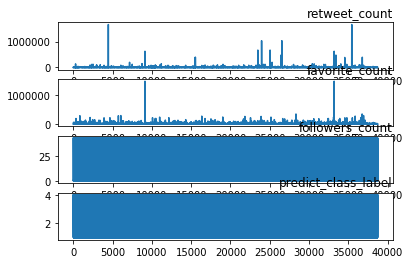

['setosa' 'versicolor' 'virginica']


In [26]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('DataSet.csv', header=0, index_col=0)
dataset.values
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=1, loc='right')
    i += 1
pyplot.show()
class_names = iris.target_names
print (class_names)


In [3]:
values[1]

array([0.   , 2.   , 0.136, 2.   ])

In [4]:
print (dataset.head())

                  retweet_count  favorite_count  followers_count  \
date                                                               
12-04-2014 05:44            254             814          43.0000   
10-05-2016 20:41              0               2           0.1360   
26-09-2018 15:10              1               0           0.0364   
22-11-2018 07:47             14               0           1.4300   
07-02-2019 11:31            685               0           0.4350   

                  predict_class_label  
date                                   
12-04-2014 05:44                    4  
10-05-2016 20:41                    2  
26-09-2018 15:10                    4  
22-11-2018 07:47                    4  
07-02-2019 11:31                    1  


In [5]:
import pandas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('DataSet.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,2] = encoder.fit_transform(values[:,2])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7,]], axis=1, inplace=True)
print(reframed.head())

      var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)       var1(t)
1  1.530788e-04   0.000557        1.0   1.000000  0.000000e+00
2  0.000000e+00   0.000001        0.2   0.333333  6.026725e-07
3  6.026725e-07   0.000000        0.0   1.000000  8.437415e-06
4  8.437415e-06   0.000000        0.6   1.000000  4.128307e-04
5  4.128307e-04   0.000000        0.4   0.000000  4.218708e-06


In [6]:
dataset.values

array([[2.540e+02, 8.140e+02, 4.300e+01, 4.000e+00],
       [0.000e+00, 2.000e+00, 1.360e-01, 2.000e+00],
       [1.000e+00, 0.000e+00, 3.640e-02, 4.000e+00],
       ...,
       [1.375e+03, 5.720e+02, 4.300e+01, 2.000e+00],
       [1.200e+01, 0.000e+00, 1.430e+00, 3.000e+00],
       [1.700e+01, 5.300e+01, 1.430e+00, 3.000e+00]])

In [7]:
dataset.head()

,retweet_count,favorite_count,followers_count,predict_class_label
date,,,,
12-04-2014 05:44,254,814,43.0000,4
10-05-2016 20:41,0,2,0.1360,2
26-09-2018 15:10,1,0,0.0364,4
22-11-2018 07:47,14,0,1.4300,4
07-02-2019 11:31,685,0,0.4350,1


In [39]:
# split into train and test sets
from sklearn.model_selection import train_test_split
values = reframed.values
X=values[:, :-1]
y=values[:, -1]

train_X, test_X, train_y , test_y = train_test_split(X, y, test_size=0.33, random_state=42)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(25951, 1, 4) (25951,) (12782, 1, 4) (12782,)


In [17]:
test_X.shape

(12782, 1, 4)

Train on 25951 samples, validate on 12782 samples
Epoch 1/50
 - 2s - loss: 0.0021 - val_loss: 9.1007e-04
Epoch 2/50
 - 1s - loss: 0.0011 - val_loss: 9.2943e-04
Epoch 3/50
 - 1s - loss: 0.0011 - val_loss: 0.0013
Epoch 4/50
 - 1s - loss: 0.0011 - val_loss: 9.9770e-04
Epoch 5/50
 - 1s - loss: 0.0012 - val_loss: 0.0011
Epoch 6/50
 - 1s - loss: 0.0011 - val_loss: 0.0010
Epoch 7/50
 - 1s - loss: 0.0011 - val_loss: 9.9661e-04
Epoch 8/50
 - 1s - loss: 0.0011 - val_loss: 9.8659e-04
Epoch 9/50
 - 1s - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
 - 1s - loss: 0.0011 - val_loss: 9.0945e-04
Epoch 11/50
 - 1s - loss: 0.0012 - val_loss: 8.4861e-04
Epoch 12/50
 - 1s - loss: 0.0011 - val_loss: 9.7117e-04
Epoch 13/50
 - 1s - loss: 0.0012 - val_loss: 0.0010
Epoch 14/50
 - 1s - loss: 0.0012 - val_loss: 9.2881e-04
Epoch 15/50
 - 1s - loss: 0.0011 - val_loss: 0.0012
Epoch 16/50
 - 1s - loss: 0.0011 - val_loss: 9.3817e-04
Epoch 17/50
 - 1s - loss: 0.0010 - val_loss: 8.8596e-04
Epoch 18/50
 - 1s - loss: 0.001

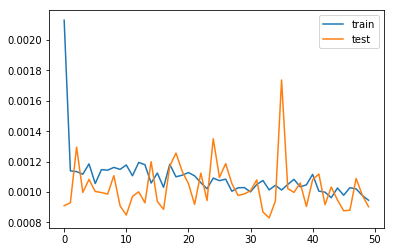

In [10]:
from tensorflow import keras as k
#from keras.utils.visualize_util import plot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
# design network
model = Sequential()

model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
#model.add(Flatten())
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, validation_split=0.33,epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [40]:
# make a prediction

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = pandas.concat((pandas.DataFrame(yhat), pandas.DataFrame(test_X[:, 1:])), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = pandas.concat((pandas.DataFrame(test_y), pandas.DataFrame(test_X[:, 1:])), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print ((inv_y),(inv_yhat))
print('Test RMSE: %.3f' % rmse)

[ 45.   2.   0. ...   0. 758.  12.] [579.64 588.94 589.92 ... 260.32  58.69 634.01]
Test RMSE: 19426.369


In [59]:
print(type(inv_y))

for i in range (0,len(inv_y)-1):
    inv_y[i] =  int(inv_y[i])
print (inv_y[100])
for i in range (0,len(inv_yhat)-1):
    inv_yhat[i] =  int(inv_yhat[i])
print (inv_y[100])

<class 'numpy.ndarray'>
9.0
9.0


In [61]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
'''iris = datasets.load_iris()
X = iris.data
y = iris.target
'''
class_names = iris.target_names
print (class_names)
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
'''
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
#cnf_matrix = confusion_matrix(y_test, y_pred)
print (type(y_test))

print(y_test,y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


['setosa' 'versicolor' 'virginica']


ValueError: Found input variables with inconsistent numbers of samples: [9684, 38]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)